In [28]:
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.snowball import SnowballStemmer
import nltk
import re
import string
import numpy as np

import pandas as pd
from fuzzywuzzy import fuzz

df = pd.read_csv('./scraper/archive/finalrevision.csv', names=["POSTID", "POSTLINK", "POSTTITLE", "POSTBODY", "POSTDATE", "POSTVOTECOUNTS", "COMMENTID", "COMMENTSCORE", "COMMENTUSERNAME", "COMMENTTEXT", "COMMENTDATETIME", "ANSWERID", "ANSWERTEXT", "ANSWERBODY", "ANSWERDATETIME", "ANSWERVOTECOUNTS", "ANSWERCMTID", "ANSWERCMTTEXT", "ANSWERCMTBODY", "ANSWERCMTDATETIME", "ANSWERCMTVOTECOUNTS" , "TYPE"])

In [34]:
ALL_COLS = ["POSTID", "POSTLINK", "POSTTITLE", "POSTBODY", "POSTDATE", "POSTVOTECOUNTS", "COMMENTID", "COMMENTSCORE", "COMMENTUSERNAME", "COMMENTTEXT", "COMMENTDATETIME", "ANSWERID", "ANSWERTEXT", "ANSWERBODY", "ANSWERDATETIME", "ANSWERVOTECOUNTS", "ANSWERCMTID", "ANSWERCMTTEXT", "ANSWERCMTBODY", "ANSWERCMTDATETIME", "ANSWERCMTVOTECOUNTS" , "TYPE"]

dPOST  = pd.DataFrame(columns=ALL_COLS)
dPOST = df.copy()
print(dPOST.shape)
dPOST.head()

(2413, 22)


,POSTID,POSTLINK,POSTTITLE,POSTBODY,POSTDATE,POSTVOTECOUNTS,COMMENTID,COMMENTSCORE,COMMENTUSERNAME,COMMENTTEXT,...,ANSWERTEXT,ANSWERBODY,ANSWERDATETIME,ANSWERVOTECOUNTS,ANSWERCMTID,ANSWERCMTTEXT,ANSWERCMTBODY,ANSWERCMTDATETIME,ANSWERCMTVOTECOUNTS,TYPE
0,952914,https://stackoverflow.com/questions/952914/how...,How do I make a flat list out of a list of lists?,\n \n<p>I have a list of lists ...,"('2009-06-04 20:30:05Z',)","('4977',)",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,post
1,952914,https://stackoverflow.com/questions/952914/how...,How do I make a flat list out of a list of lists?,\n \n<p>I have a list of lists ...,"('2009-06-04 20:30:05Z',)","('4977',)",comment-24914362,53.0,RichieHindle,There's an in-depth discussion of this here: r...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,post_comment
2,952914,https://stackoverflow.com/questions/952914/how...,How do I make a flat list out of a list of lists?,\n \n<p>I have a list of lists ...,"('2009-06-04 20:30:05Z',)","('4977',)",comment-115552806,2.0,Golden Lion,stackoverflow.com/questions/50259290/… (this a...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,post_comment
3,952914,https://stackoverflow.com/questions/952914/how...,How do I make a flat list out of a list of lists?,\n \n<p>I have a list of lists ...,"('2009-06-04 20:30:05Z',)","('4977',)",NaN,NaN,NaN,NaN,...,"Given a list of lists l,\nflat_list = [item fo...","('\n<p>Given a list of lists <code>l</code>,</...","2010-10-15 01:21:33Z, License: CC BY-SA 2.5","('6900',)",NaN,NaN,NaN,NaN,NaN,answer
4,952914,https://stackoverflow.com/questions/952914/how...,How do I make a flat list out of a list of lists?,\n \n<p>I have a list of lists ...,"('2009-06-04 20:30:05Z',)","('4977',)",NaN,NaN,NaN,NaN,...,"Given a list of lists l,\nflat_list = [item fo...","('\n<p>Given a list of lists <code>l</code>,</...","2010-10-15 01:21:33Z, License: CC BY-SA 2.5","('6900',)","('4204394',)","I tried a test with the same data, using itert...",('\n \n <span cl...,"Oct 15, 2010 at 1:21","('617',)",answer_comment


## Analyze how often the topic has been brought up

0       '2009-06-04 20:30:05Z',
1       '2009-06-04 20:30:05Z',
2       '2009-06-04 20:30:05Z',
3       '2009-06-04 20:30:05Z',
4       '2009-06-04 20:30:05Z',
                 ...           
2408    '2022-06-16 18:19:44Z',
2409    '2022-06-16 18:19:44Z',
2410    '2022-06-16 18:19:44Z',
2411    '2022-06-16 18:19:44Z',
2412    '2022-06-16 18:19:44Z',
Name: POSTDATE, Length: 2413, dtype: object


/var/folders/x0/f6tjyw_s7vqbx5gcpvt0z31w0000gn/T/ipykernel_7610/3482655505.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dPOST['POSTDATE'] = dPOST['POSTDATE'].str.replace('(', '')
/var/folders/x0/f6tjyw_s7vqbx5gcpvt0z31w0000gn/T/ipykernel_7610/3482655505.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dPOST['POSTDATE'] = dPOST['POSTDATE'].str.replace(')', '')


<AxesSubplot:xlabel='POSTDATE'>

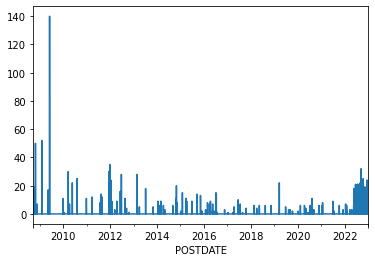

In [32]:
# clean the date strings
dPOST['POSTDATE'] = dPOST['POSTDATE'].str.replace('(', '')
dPOST['POSTDATE'] = dPOST['POSTDATE'].str.replace(')', '')

dPOST['POSTDATE'] = pd.to_datetime(dPOST['POSTDATE'])
dPOST['POSTDATE'] = dPOST['POSTDATE'].dt.date
dPOST['POSTDATE'] = pd.to_datetime(dPOST['POSTDATE'])
dPOST = dPOST.set_index('POSTDATE')
dPOST = dPOST.groupby(pd.Grouper(freq='D')).count()
dPOST['POSTID'].plot()

## Analyze each question's time span

In [36]:
dTS = df.copy()
target = "How do I make a flat list out of a list of lists?"

dTS = dTS[dTS['POSTTITLE'] == target]
dTS.shape

(140, 22)

In [39]:
post_date = dTS['POSTDATE'].unique()[0]
post_date

"('2009-06-04 20:30:05Z',)"

In [51]:
comment_date = dTS['COMMENTDATETIME'].unique()
comment_date = comment_date[~pd.isnull(comment_date)]

comment_date = [x.split(',') for x in comment_date]
comment_date = [x[0] for x in comment_date]
comment_date

['2009-06-04 20:41:13Z', '2020-12-18 16:48:11Z']

In [52]:
answer_date = dTS['ANSWERDATETIME'].unique()
answer_date = answer_date[~pd.isnull(answer_date)]

answer_date = [x.split(',') for x in answer_date]
answer_date = [x[0] for x in answer_date]
answer_date

['2010-10-15 01:21:33Z',
 '2014-09-03 14:13:45Z',
 '2010-06-15 18:55:14Z',
 '2019-01-20 13:57:20Z',
 '2012-04-25 18:26:07Z',
 '2017-03-25 15:32:05Z']

In [58]:
answer_cmt_date = dTS['ANSWERCMTDATETIME'].unique()
answer_cmt_date = answer_cmt_date[~pd.isnull(answer_cmt_date)]
answer_cmt_date = [x.replace('at', '') for x in answer_cmt_date]
answer_cmt_date = [x.replace(',', '') for x in answer_cmt_date]
answer_cmt_date

['Oct 15 2010  1:21',
 'Jul 27 2011  16:43',
 'Aug 29 2013  1:38',
 'Jul 12 2021  17:19',
 'Aug 11 2021  12:04',
 'Sep 3 2014  14:13',
 'Nov 12 2015  20:26',
 'Oct 21 2021  3:35',
 'Oct 25 2021  14:34',
 'Jun 15 2010  18:55',
 'Apr 25 2012  18:24',
 'Dec 3 2014  10:35',
 'Jul 31 2017  18:04',
 'Jan 4 2018  16:46',
 'Jan 20 2019  13:57',
 'Apr 30 2020  0:31',
 'Nov 14 2020  6:05',
 'Dec 5 2020  11:08',
 'Oct 11 2021  17:05',
 'Apr 25 2012  18:26',
 'Oct 2 2020  17:00',
 'Mar 25 2017  15:32',
 'Mar 25 2017  17:51',
 'Jun 15 2017  10:22',
 'Apr 30 2018  16:46',
 'Jun 12 2019  21:35']

/var/folders/x0/f6tjyw_s7vqbx5gcpvt0z31w0000gn/T/ipykernel_7610/4259393917.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  timedf = timedf.append(pd.DataFrame({'date': answer_date, 'type': 'answer'}), ignore_index=True)
/var/folders/x0/f6tjyw_s7vqbx5gcpvt0z31w0000gn/T/ipykernel_7610/4259393917.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  timedf = timedf.append(pd.DataFrame({'date': comment_date, 'type': 'comment'}), ignore_index=True)


<AxesSubplot:xlabel='date'>

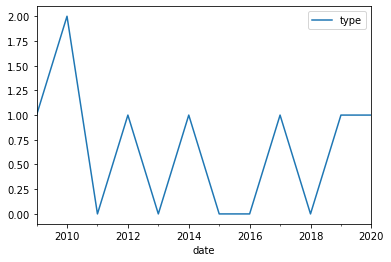

In [77]:
import plotly.express as px
import datetime
import pytz

utc=pytz.UTC

timedf = pd.DataFrame(columns=['date', 'type'])

timedf = timedf.append(pd.DataFrame({'date': answer_date, 'type': 'answer'}), ignore_index=True)
timedf = timedf.append(pd.DataFrame({'date': comment_date, 'type': 'comment'}), ignore_index=True)
# timedf = timedf.append(pd.DataFrame({'date': answer_cmt_date, 'type': 'answer_comment'}), ignore_index=True)

timedf['date'] = pd.to_datetime(timedf['date'])
timedf = timedf.set_index('date')
timedf = timedf.groupby(pd.Grouper(freq='Y')).count()
timedf.plot()
